In [1]:
import numpy as np
import h5py
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn


In [2]:
#Neural network with 1 hidden layer

class MultiRegressor1Layer(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(4)
    self.linear1 = nn.Linear(in_features=4, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.dropout = nn.Dropout()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    #self.dropout = nn.Dropout()
    self.act2 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    #x = self.dropout(x)
    x = self.linear2(x)
    x = self.norm2(x)
    #x = self.dropout(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(2)
    self.linear1 = nn.Linear(in_features=2, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    self.act2 = nn.LeakyReLU()
    self.linear3 = nn.Linear(in_features=16, out_features=16)
    self.norm3 = nn.BatchNorm1d(16)
    self.act3 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.norm2(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

# Load model

In [3]:
numEpochs = 15
numPoints = 20000

#PATH = "Models/" + str(numPoints) + "_points_" + str(numEpochs) + "_epochs_" + "WP_Constraints.pt"
PATH = "Models/20000_points_2_inputs_35_epochs_2_layers_lr1e-3_WP_Constraints.pt"
#PATH = "Models/40000_points_2_inputs_100_epochs__gaussian_noise_0.1_2_layers_lr1e-3_WP_Constraints.pt"
#PATH = "Models/40000_points_2_inputs_100_epochs__gaussian_noise_0.1_2_layers_lr1e-3_WP_Constraints.pt"
model = MLP()
model.load_state_dict(torch.load(PATH))
model.eval()

MLP(
  (norm0): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=2, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): LeakyReLU(negative_slope=0.01)
  (linear2): Linear(in_features=64, out_features=16, bias=True)
  (norm2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): LeakyReLU(negative_slope=0.01)
  (linear3): Linear(in_features=16, out_features=16, bias=True)
  (norm3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): LeakyReLU(negative_slope=0.01)
  (output): Linear(in_features=16, out_features=3, bias=True)
)

# Set up mesh grid

In [4]:
gridPoints = 500

intensMin = 1e18
intensMax = 1e19

durationMin = 40
durationMax = 40

thicknessMin = 0.5
thicknessMax = 10

spotSizeMin = 2
spotSizeMax = 2

intensSpan = np.linspace(intensMin, intensMax, gridPoints)
durationSpan = np.linspace(durationMin, durationMax, gridPoints)
thicknessSpan = np.linspace(thicknessMin, thicknessMax, gridPoints)
spotSizeSpan = np.linspace(spotSizeMin, spotSizeMax, gridPoints)

In [5]:
logIntensSpan = np.log(intensSpan)
#print(logIntensGrid)

In [6]:
#Reformat inputGrid so it is a 1-dimensional numpy array
#We want a 1-d Numpy array because we can easily convert that into a Pytorch tensor
#to feed into our model

# npInput = np.zeros(shape = ( (gridPoints ** 2), 2 ))

# index = 0

# for intens in logIntensSpan:
#     for thickness in thicknessSpan:
#         npInput[index] = (intens, thickness)
#         index += 1

In [7]:
gridLogIntens, gridThickness = np.meshgrid(logIntensSpan, thicknessSpan)

gridIntens = np.exp(gridLogIntens)

grid = torch.Tensor(np.c_[gridLogIntens.ravel(), gridThickness.ravel()])

In [8]:
# #Convert np array to tensor

# tensorInput = torch.Tensor(npInput)

# print(torch.select(tensorInput, 1, 0))

# #Note: torch.select(tensorInput, 1, 0) gives all logIntens values as a 1-d tensor
# #      torch.select(tensorInput, 1, 1) gives all thickness values as a 1-d tensor

In [9]:
#print(tensorInput.size())

#output = model(tensorInput)
output = model(grid)

In [10]:
npMaxEnergy = np.exp(output[:, 0].view(gridThickness.shape).detach().numpy())
npTotalEnergy = np.exp(output[:, 1].view(gridThickness.shape).detach().numpy())
npAvgEnergy = np.exp(output[:, 2].view(gridThickness.shape).detach().numpy())

# npIntens = np.exp(torch.select(tensorInput, 1, 0).detach().numpy())
# npThickness = torch.select(tensorInput, 1, 1).detach().numpy()

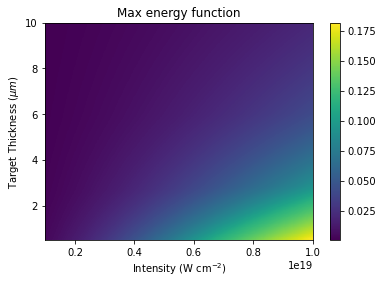

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#plt.pcolormesh(gridLogIntens, gridThickness, npMaxEnergy, cmap=plt.cm.get_cmap('Blues'))

plt.title("Max energy function")
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel(r'Target Thickness ($\mu m$)')
plt.pcolormesh(gridIntens, gridThickness, npMaxEnergy, shading = 'auto')
plt.colorbar()

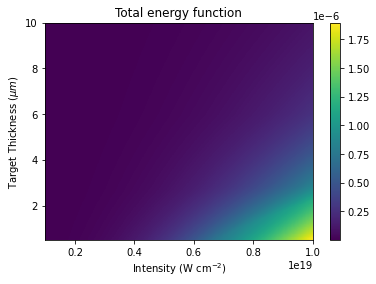

In [12]:
plt.title("Total energy function")
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel(r'Target Thickness ($\mu m$)')

plt.pcolormesh(gridIntens, gridThickness, npTotalEnergy, shading = 'auto')
plt.colorbar()

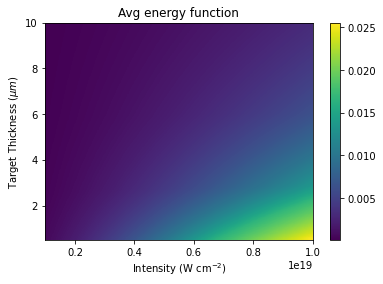

In [13]:
plt.title("Avg energy function")
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel(r'Target Thickness ($\mu m$)')

plt.pcolormesh(gridIntens, gridThickness, npAvgEnergy, shading = 'auto')
plt.colorbar()

<IPython.core.display.Javascript object>


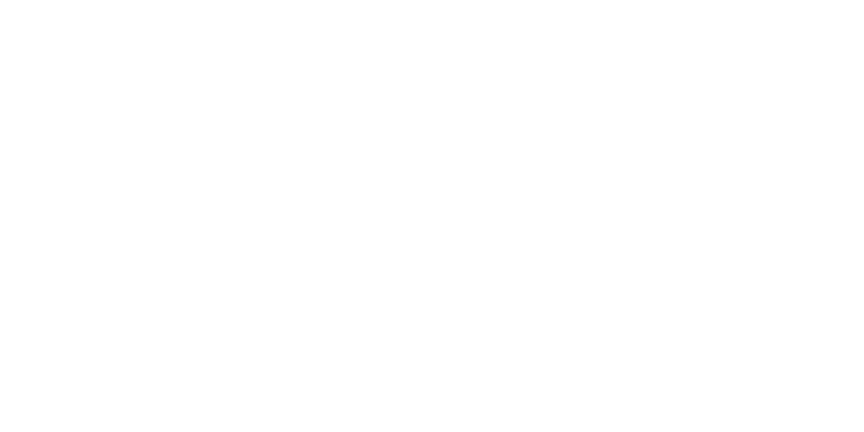

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection='3d')
plt.title("Max energy function")
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel(r'Target Thickness ($\mu m$)')
ax.set_zlabel('Max Proton Energy (MeV)')
ax.plot_surface(gridIntens, gridThickness, npMaxEnergy,cmap='viridis', edgecolor='none')

<IPython.core.display.Javascript object>


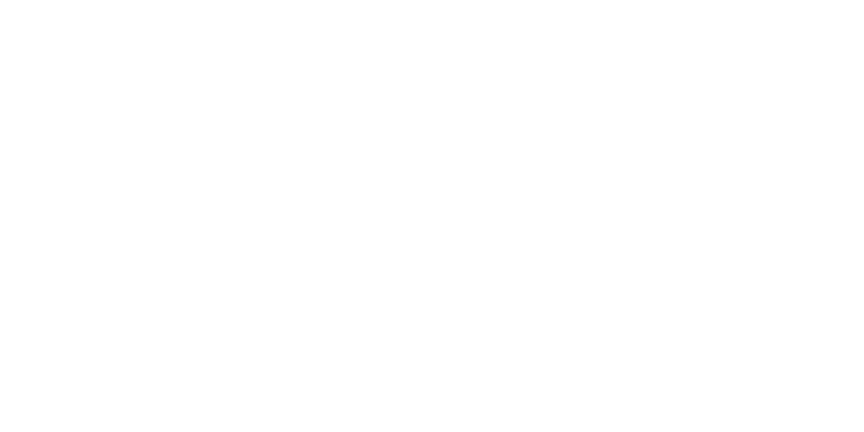

In [15]:
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection='3d')
plt.title("Total energy function")
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel(r'Target Thickness ($\mu m$)')
ax.set_zlabel('Total Proton Energy (MeV)')
ax.plot_surface(gridIntens, gridThickness, npTotalEnergy,cmap='viridis', edgecolor='none')

<IPython.core.display.Javascript object>


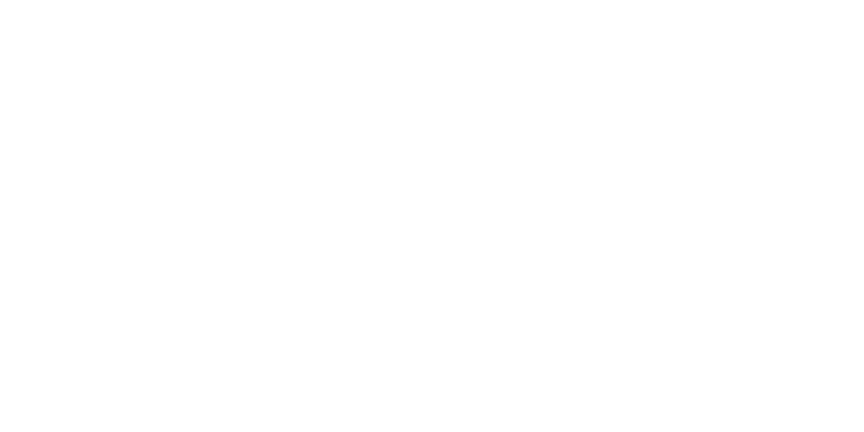

In [16]:
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection='3d')
plt.title("Avg energy function")
plt.xlabel(r'Intensity (W cm$^{-2}$)')
plt.ylabel(r'Target Thickness ($\mu m$)')
ax.set_zlabel('Average Proton Energy (MeV)')
ax.plot_surface(gridIntens, gridThickness, npAvgEnergy,cmap='viridis', edgecolor='none')

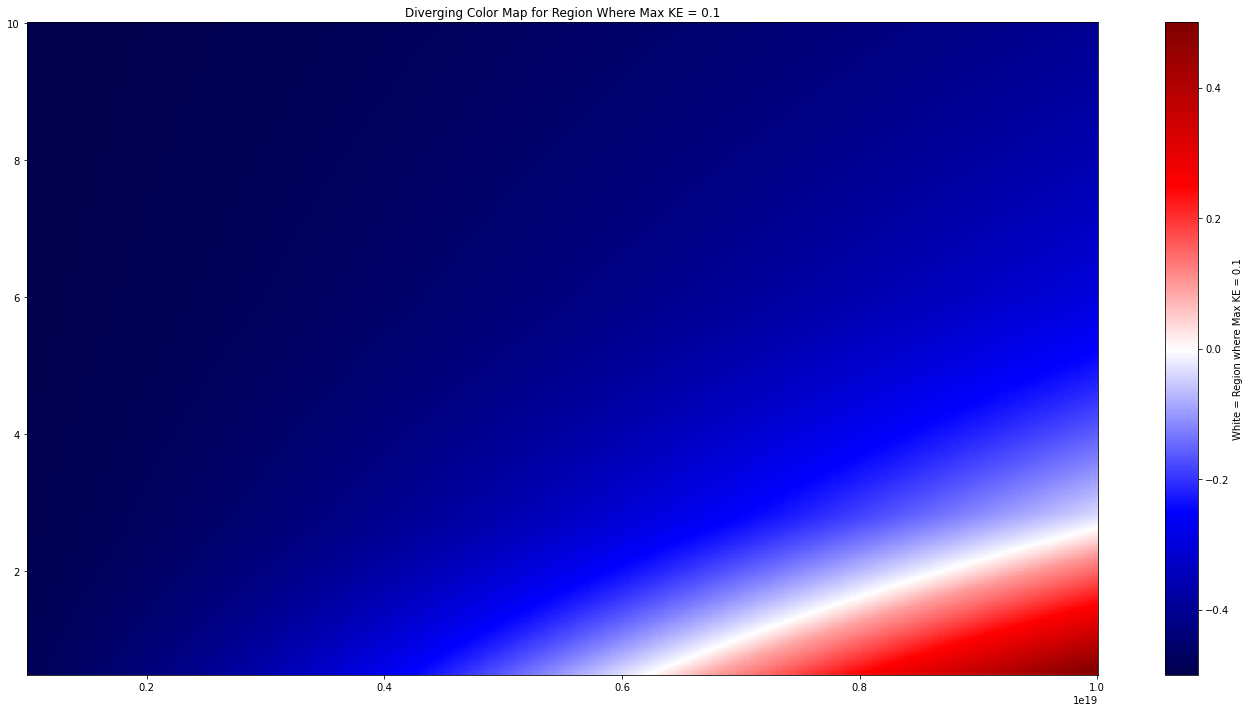

In [17]:
#WIP
#Trying to see if we can use a diverging color map to find locations in the neural network
#Where we can get a specific energy value with some sort of combination with intensity and thickness
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
offset = mcolors.TwoSlopeNorm(vcenter=0)

maxTarget = 0.1
npConstant = np.full(npMaxEnergy.shape, maxTarget)

npMaxTarget = npMaxEnergy - npConstant
npMaxTarget = offset(npMaxTarget)
npMaxTarget = npMaxTarget - 0.5

fig = plt.figure(figsize = (24,12))
plt.title("Diverging Color Map for Region Where Max KE = " + str(maxTarget))
plt.pcolormesh(gridIntens, gridThickness, npMaxTarget, cmap = 'seismic', shading = 'auto')
plt.colorbar(label = "White = Region where Max KE = " + str(maxTarget))

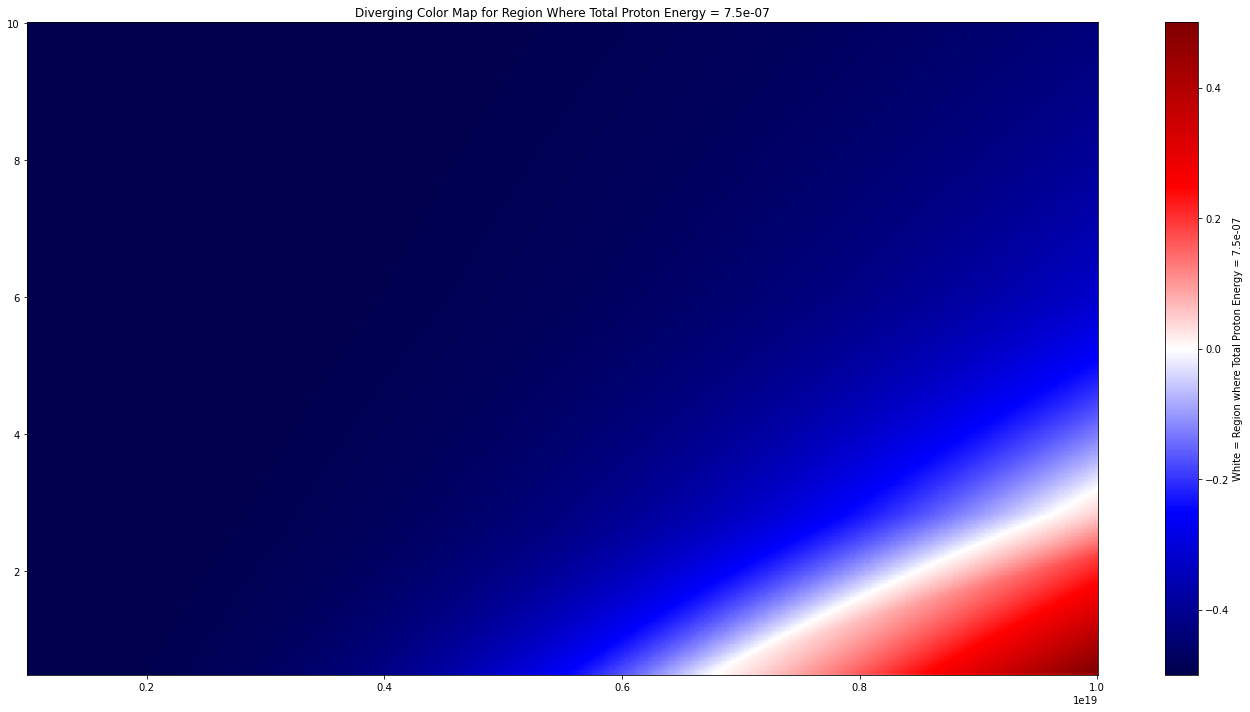

In [18]:
totalTarget = 0.75e-6
npConstant = np.full(npTotalEnergy.shape, totalTarget)
offset = mcolors.TwoSlopeNorm(vcenter=0)

npTotalTarget = npTotalEnergy - npConstant
npTotalTarget = offset(npTotalTarget)
npTotalTarget = npTotalTarget - 0.5

fig = plt.figure(figsize = (24,12))
plt.title("Diverging Color Map for Region Where Total Proton Energy = " + str(totalTarget))
plt.pcolormesh(gridIntens, gridThickness, npTotalTarget, cmap = 'seismic', shading = 'auto')
plt.colorbar(label = "White = Region where Total Proton Energy = " + str(totalTarget))

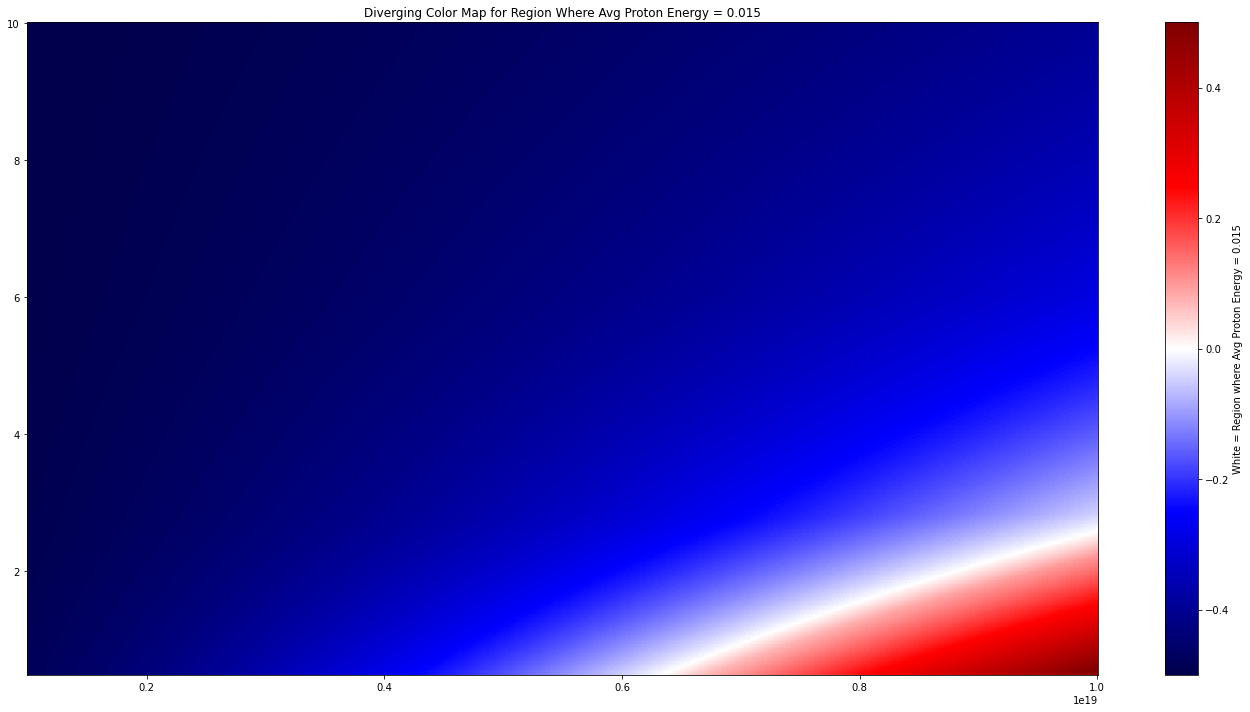

In [19]:
avgTarget = 0.015
npConstant = np.full(npAvgEnergy.shape, avgTarget)
offset = mcolors.TwoSlopeNorm(vcenter=0)

npAvgTarget = npAvgEnergy - npConstant
npAvgTarget = offset(npAvgTarget)
npAvgTarget = npAvgTarget - 0.5

fig = plt.figure(figsize = (24,12))
plt.title("Diverging Color Map for Region Where Avg Proton Energy = " + str(avgTarget))
plt.pcolormesh(gridIntens, gridThickness, npAvgTarget, cmap = 'seismic', shading = 'auto')
plt.colorbar(label = "White = Region where Avg Proton Energy = " + str(avgTarget))

<IPython.core.display.Javascript object>


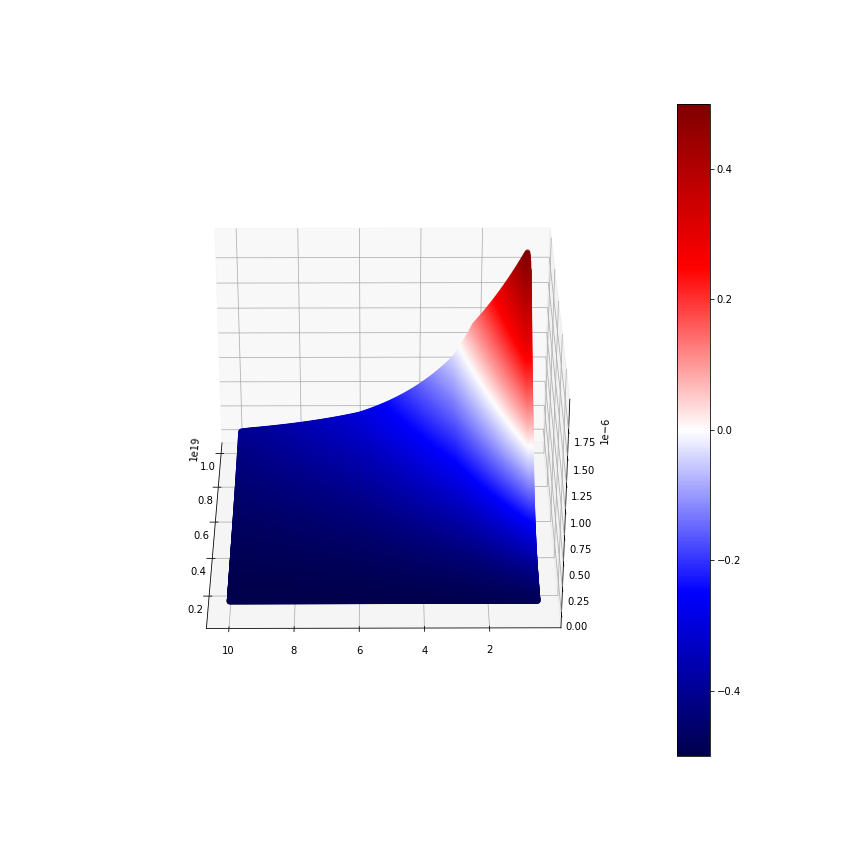

In [20]:
#WIP
#Want 4D plot with gridIntens, gridThickness, npTotalEnergy, and npMaxTarget
#How to implement this with Matplotlib notebook so one could freely rotate graph?
%matplotlib notebook

offset = mcolors.TwoSlopeNorm(vcenter=0)

npConstant = np.full(npMaxEnergy.shape, maxTarget)

npMaxTarget = npMaxEnergy - npConstant
npMaxTarget = offset(npMaxTarget)
npMaxTarget = npMaxTarget - 0.5

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')

# plt.title("Diverging Color Map for Region Where Max KE = " + str(maxTarget))
# plt.pcolormesh(gridIntens, gridThickness, npMaxTarget, cmap = 'seismic', shading = 'auto')
# plt.colorbar(label = "White = Region where Max KE = " + str(maxTarget))

#ax = plt.axes(projection='3d')
ax.view_init(10, 80)


img = ax.scatter3D(gridIntens, gridThickness, npTotalEnergy, c=npMaxTarget, cmap='seismic')
fig.colorbar(img)
plt.show()

In [21]:
# #WIP

# npOptimal = npAvgTarget + npTotalTarget + npMaxTarget
# # print(npAvgTarget)
# # print(npTotalTarget)
# # print(npMaxTarget)
# # print(npOptimal)
# npOptimal = offset(npOptimal)
# #print(npOptimal)
# npOptimal = npOptimal - 0.5


# fig = plt.figure(figsize = (24, 12))
# plt.title("Optimal location for given parameters Max KE = " + str(maxTarget) + \
#           " Total Proton Energy = " + str(totalTarget) + " Avg Proton Energy = " + str(avgTarget))
# plt.pcolormesh(gridIntens, gridThickness, npOptimal, cmap = 'seismic', shading = 'auto')
# plt.colorbar()